In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!pip install watermark
!conda install watermark -y --channel conda-forge
%load_ext watermark

  Using cached zipp-3.17.0-py3-none-any.whl.metadata (3.7 kB)
Using cached zipp-3.17.0-py3-none-any.whl (7.4 kB)
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\khaled\miniconda3\envs\handsOnML

  added / updated specs:
    - watermark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    importlib-metadata-7.0.2   |     pyha770c72_0          26 KB  conda-forge
    watermark-2.4.3            |     pyhd8ed1ab_0          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          39 KB

The following NEW packages will be INSTALLED:

  importlib-metadata conda-forge/noarch::importlib-metadata-7.0.2-pyha770c72_0 
  ucrt               conda-forge/win-64::ucrt-10.0.22621.0-h57928b3_0 
  vc14_runtime       conda-forge/

## 1- Get the data into a dataframe form 

In [16]:
df_iris = pd.read_csv("KnnInPython/iris.csv")
df_iris.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## 2- Get Features into a Numpy Array

In [18]:
X = df_iris[['PetalLength[cm]', 'PetalWidth[cm]']].values
print(X.shape)

(150, 2)


In [19]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

## 3- Get Class Labels into a Numpy Array

In [23]:
label_dict = {'Iris-setosa': 0,
             'Iris-versicolor': 1,
             'Iris-virginica': 2}
df_iris['Classlabel'] = df_iris['Species'].map(label_dict)
df_iris[70:]

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,Classlabel
70,71,5.9,3.2,4.8,1.8,Iris-versicolor,1
71,72,6.1,2.8,4.0,1.3,Iris-versicolor,1
72,73,6.3,2.5,4.9,1.5,Iris-versicolor,1
73,74,6.1,2.8,4.7,1.2,Iris-versicolor,1
74,75,6.4,2.9,4.3,1.3,Iris-versicolor,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [26]:
y = df_iris['Classlabel'].values
np.bincount(y)

array([50, 50, 50], dtype=int64)

## 4- Shuffle Dataset and Create Training and Test Subsets

In [38]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [50]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [51]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

In [48]:
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

## 5- Doing step 1-4 in Scikit-Learn

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data[:, 2:], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=rnd,
                                                   shuffle=True)

In [55]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (105, 2)
y_train shape: (105,)


## 6- Plot the Dataset

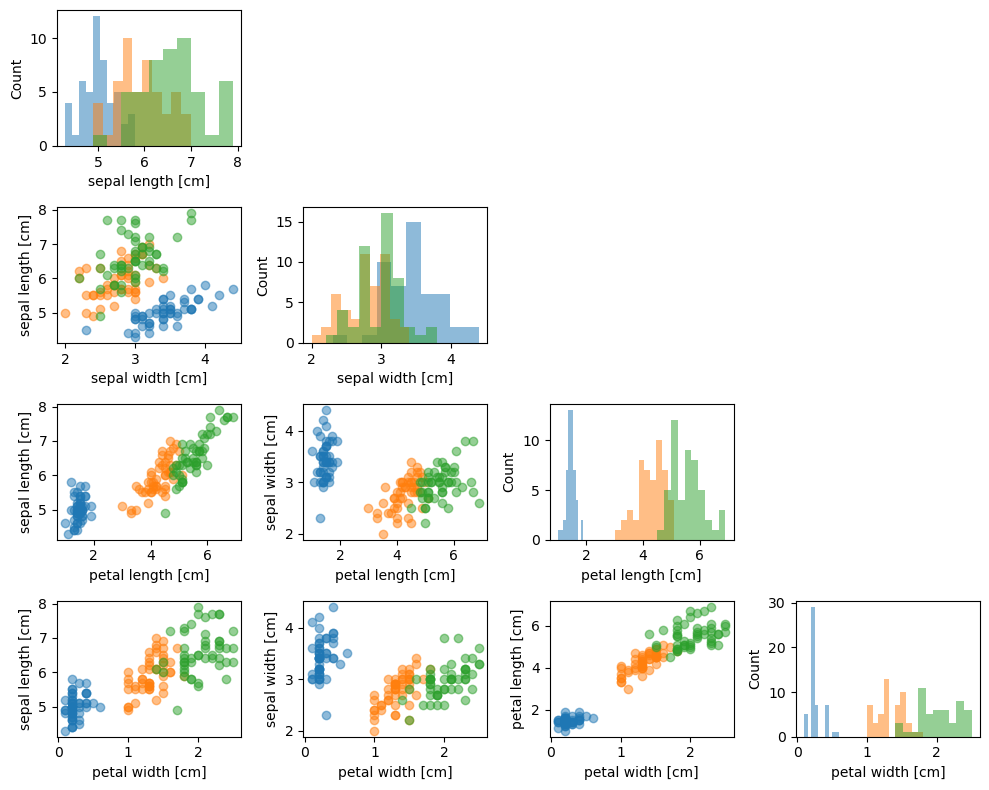

In [61]:
from mlxtend.plotting import scatterplotmatrix

names = ['sepal length [cm]', 'sepal width [cm]', 
         'petal length [cm]', 'petal width [cm]']

fig, axes = scatterplotmatrix(iris.data[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(iris.data[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(iris.data[y==2], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.show()

C:\Users\khaled\AppData\Local\Temp\ipykernel_21240\967931454.py:8: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  fig.legend()


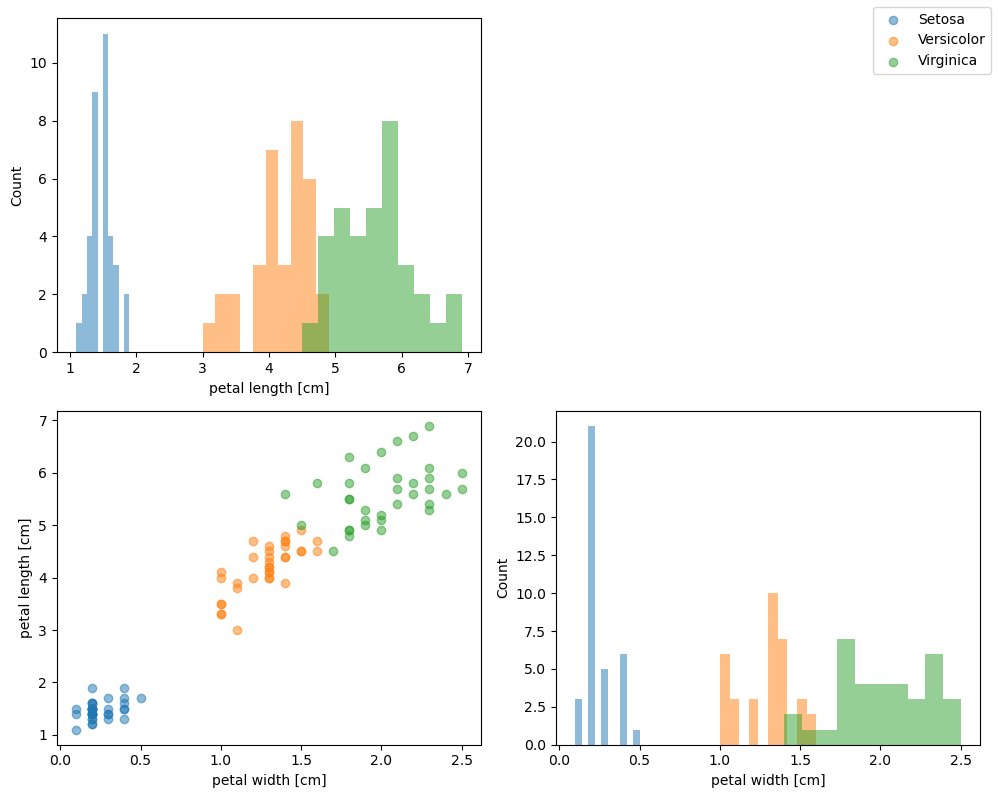

In [65]:
names = ['petal length [cm]', 'petal width [cm]']
labels = ['Setosa', 'Versicolor','Virginica']

fig, axes = scatterplotmatrix(X_train[y_train==0], figsize=(10, 8), alpha=0.5, label=labels[0])
fig, axes = scatterplotmatrix(X_train[y_train==1], fig_axes=(fig, axes), alpha=0.5, label=labels[1])
fig, axes = scatterplotmatrix(X_train[y_train==2], fig_axes=(fig, axes), alpha=0.5, names=names, label=labels[2])

fig.legend()
plt.tight_layout()
plt.show()

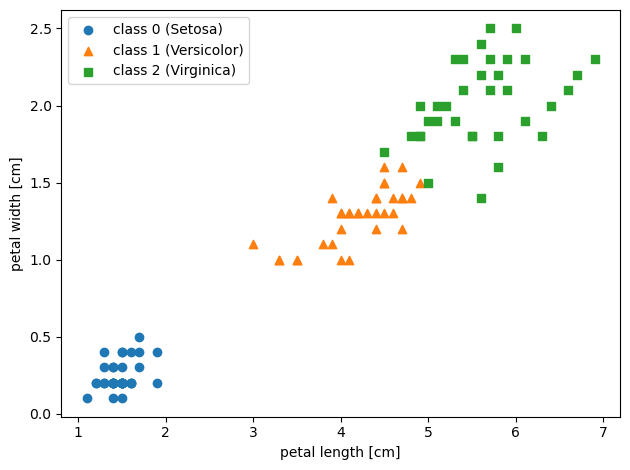

In [73]:
plt.scatter(X_train[y_train==0, 0], 
           X_train[y_train==0, 1],
           marker='o',
           label='class 0 (Setosa)')
plt.scatter(X_train[y_train==1, 0],
           X_train[y_train==1, 1],
           marker='^',
           label='class 1 (Versicolor)')
plt.scatter(X_train[y_train==2, 0], 
           X_train[y_train==2, 1],
           marker='s',
           label='class 2 (Virginica)')

plt.xlabel(names[0])
plt.ylabel(names[1])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 7 - Fit k-Nearest Neighbors Model

In [84]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 8- Use kNN Model to Make Predictions 

In [76]:
y_pred = knn_model.predict(X_test)

In [91]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

print(f"Test accuracy: {accuracy:.3f}%")

Test accuracy: 91.111%


## 9- Visualize Decision Boundary

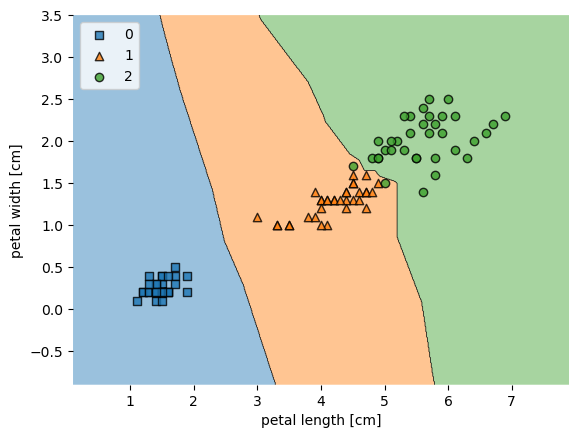

In [88]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel(names[0])
plt.ylabel(names[1])
plt.legend(loc='upper left')
plt.show()

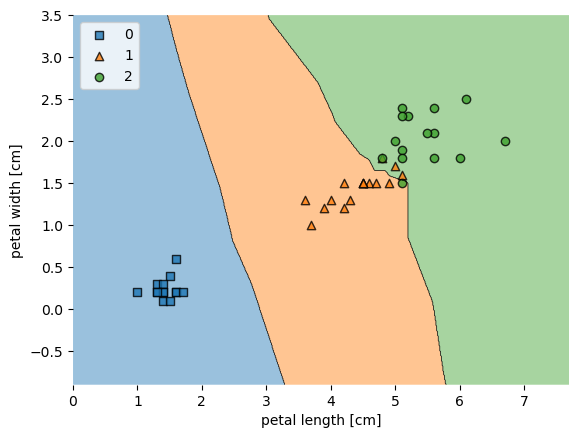

In [92]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()